# Session Based Datasets

when running `run_example/session_based_rec_example.py` we see it supports only 3 datasets : `tmall-session`, `diginetica-session` and `nowplaying-session` 
however, when looking at [RecBole Dataset List](https://recbole.io/dataset_list.html) we see many more datasets.  
moreover, it looks like the `-session` based versions are different than the files downloaded from the [Google Drive](https://drive.google.com/drive/folders/1so0lckI6N6_niVEYaBu-LIcpOdZf99kj?usp=sharing)  

in this notebook I'll try to explore the various datasets to understand what do we have in it

I'll follow the example to download the datasets

In [1]:
import os 
import pandas as pd
import numpy as np
from datetime import datetime
from recbole.config import Config
from recbole.data import create_dataset
from recbole.data.utils import get_dataloader
from recbole.utils import init_logger, init_seed, get_model, get_trainer, set_color

In [28]:
from dataclasses import dataclass

@dataclass
class Arguments:
    model:str = 'GRU4Rec'
    dataset:str = 'diginetica-session'
    validation: bool = 'False'
    valid_portion: float = 0.1

args=Arguments()


## DIGINETICA
there are 2 versions : the `diginetica-session` and the `diginetica` 

### diginetica-session

In [29]:
args=Arguments()
args

Arguments(model='GRU4Rec', dataset='diginetica-session', validation='False', valid_portion=0.1)

In [30]:
config_dict = {
    'USER_ID_FIELD': 'session_id',
    'load_col': None,
    'neg_sampling': None,
    'benchmark_filename': ['train', 'test'],
    'alias_of_item_id': ['item_id_list'],
    'topk': [20],
    'metrics': ['Recall', 'MRR'],
    'valid_metric': 'MRR@20'
}

In [31]:
config = Config(model=args.model, dataset=f'{args.dataset}', config_dict=config_dict)
config.final_config_dict

{'gpu_id': 0,
 'use_gpu': True,
 'seed': 2020,
 'state': 'INFO',
 'reproducibility': True,
 'data_path': 'dataset/diginetica-session',
 'checkpoint_dir': 'saved',
 'show_progress': True,
 'save_dataset': False,
 'dataset_save_path': None,
 'save_dataloaders': False,
 'dataloaders_save_path': None,
 'log_wandb': False,
 'wandb_project': 'recbole',
 'epochs': 300,
 'train_batch_size': 2048,
 'learner': 'adam',
 'learning_rate': 0.001,
 'neg_sampling': None,
 'eval_step': 1,
 'stopping_step': 10,
 'clip_grad_norm': None,
 'weight_decay': 0.0,
 'loss_decimal_place': 4,
 'require_pow': False,
 'eval_args': {'split': {'LS': 'valid_and_test'},
  'order': 'TO',
  'mode': 'full',
  'group_by': 'user'},
 'repeatable': True,
 'metrics': ['Recall', 'MRR'],
 'topk': [20],
 'valid_metric': 'MRR@20',
 'valid_metric_bigger': True,
 'eval_batch_size': 4096,
 'metric_decimal_place': 4,
 'embedding_size': 64,
 'hidden_size': 128,
 'num_layers': 1,
 'dropout_prob': 0.3,
 'loss_type': 'CE',
 'field_separat

In [32]:
config.final_config_dict['data_path'] = os.path.join(os.path.dirname(os.getcwd()),config.final_config_dict['data_path'])
config.final_config_dict['data_path']

'/home/gkoren2/study/git/guyk1971/RecBole/dataset/diginetica-session'

In [33]:
digi_sess = create_dataset(config)
digi_sess

diginetica-session
The number of users: 719471
Average actions of users: 1.0845872656260858
The number of items: 43098
Average actions of items: 18.110520574651286
The number of inters: 780328
The sparsity of the dataset: 99.9974834429483%
Remain Fields: ['session_id', 'item_id_list', 'item_id', 'item_length']

In [34]:
digi_sess

diginetica-session
The number of users: 719471
Average actions of users: 1.0845872656260858
The number of items: 43098
Average actions of items: 18.110520574651286
The number of inters: 780328
The sparsity of the dataset: 99.9974834429483%
Remain Fields: ['session_id', 'item_id_list', 'item_id', 'item_length']

In [35]:
# the main interaction data is in the inter_feat data frame:
digi_sess_df = digi_sess.inter_feat
digi_sess_df.head(30)


,session_id,item_id_list,item_id,item_length
0,1,[24864],1,1
1,2,"[137, 3]",2,2
2,3,[137],3,1
3,4,[299],4,1
4,5,[1010],5,1
5,6,"[1580, 10, 9, 9, 8, 7]",6,6
6,7,"[1580, 10, 9, 9, 8]",7,5
7,8,"[1580, 10, 9, 9]",8,4
8,9,"[1580, 10, 9]",9,3
9,10,"[1580, 10]",9,2


In [ ]:
digi_sess_df.session_id.value_counts()

In [ ]:
digi_sess_df.item_id.value_counts()

In [ ]:
digi_sess_df.item_id.max()

### diginetica

In [3]:
digi_args = Arguments(dataset='diginetica')
digi_args

Arguments(model='GRU4Rec', dataset='diginetica', validation='False', valid_portion=0.1)

In [4]:
digi_config_dict= {
        'USER_ID_FIELD': 'session_id',
        'load_col': None,       # load all columns. dont filter anything
        'neg_sampling': None,
        # 'benchmark_filename': ['train', 'test'],
        # 'alias_of_item_id': ['item_id_list'],
        'eval_args':{
            'group_by': 'user',
            'order': 'TO',
            'split':{'LS': 'test_only'},
            'mode': 'uni100'},
        'topk': [20],
        'metrics': ['Recall', 'MRR'],
        'valid_metric': 'MRR@20'
    }


In [5]:
digi_config = Config(model=digi_args.model, dataset=f'{digi_args.dataset}', config_dict=digi_config_dict)
digi_config.final_config_dict

{'gpu_id': 0,
 'use_gpu': True,
 'seed': 2020,
 'state': 'INFO',
 'reproducibility': True,
 'data_path': 'dataset/diginetica',
 'checkpoint_dir': 'saved',
 'show_progress': True,
 'save_dataset': False,
 'dataset_save_path': None,
 'save_dataloaders': False,
 'dataloaders_save_path': None,
 'log_wandb': False,
 'wandb_project': 'recbole',
 'epochs': 300,
 'train_batch_size': 2048,
 'learner': 'adam',
 'learning_rate': 0.001,
 'neg_sampling': None,
 'eval_step': 1,
 'stopping_step': 10,
 'clip_grad_norm': None,
 'weight_decay': 0.0,
 'loss_decimal_place': 4,
 'require_pow': False,
 'eval_args': {'group_by': 'user',
  'order': 'TO',
  'split': {'LS': 'test_only'},
  'mode': 'uni100'},
 'repeatable': True,
 'metrics': ['Recall', 'MRR'],
 'topk': [20],
 'valid_metric': 'MRR@20',
 'valid_metric_bigger': True,
 'eval_batch_size': 4096,
 'metric_decimal_place': 4,
 'embedding_size': 64,
 'hidden_size': 128,
 'num_layers': 1,
 'dropout_prob': 0.3,
 'loss_type': 'CE',
 'field_separator': '\t',


In [6]:
digi_config.final_config_dict['data_path'] = os.path.join(os.path.dirname(os.getcwd()),digi_config.final_config_dict['data_path'])
digi_config.final_config_dict['data_path']

'/home/gkoren2/study/git/guyk1971/RecBole/dataset/diginetica'

In [7]:
diginetica = create_dataset(digi_config)
diginetica

diginetica
The number of users: 204790
Average actions of users: 4.078212208663551
The number of items: 184048
Average actions of items: 19.3613918768546
The number of inters: 835173
The sparsity of the dataset: 99.99778416918709%
Remain Fields: ['session_id', 'item_id', 'timestamp', 'number of times', 'item_priceLog2', 'item_name', 'item_category']

In [8]:
digi_df=diginetica.inter_feat
digi_df.head()

,session_id,item_id,timestamp,number of times
0,1,1,1.463053e+09,1.0
1,1,2,1.463754e+09,1.0
2,1,3,1.462967e+09,1.0
3,1,4,1.463836e+09,1.0
4,1,5,1.462897e+09,1.0


In [9]:
digi_df.item_id.max()

43136

In [ ]:
digi_df.item_id.value_counts()

### compare

In [ ]:
# diginetica.inter_feat.session_id.value_counts()
print(len(diginetica))
print(len(digi_sess))

In [ ]:
digi_sess

In [ ]:
print(len(digi_sess.inter_feat.session_id.unique()))
digi_sess.inter_feat.head()

In [ ]:
print(len(diginetica.inter_feat.session_id.unique()))
diginetica.inter_feat.head()

In [ ]:
len(diginetica.inter_feat.session_id)

when looking at the datasets summaries we see the following :
![img](SBRS_datasets.jpg)

only in the number of items I see some similarity between the table and the `diginetica-session`. it looks like diginetica is not a session based dataset but was made such using some "session-ization" process

Lets check how the dataset from `session-rec` looks like:

### session-rec
the datasets (according to the paper) are:  
![img2](empirical_sbrs_datasets.png)  


I see different numbers that I cant relate... 
it looks like there are several pre-processing procedures that each yields a slightly different dataset. 
the idea is to compare several algorithms on the same dataset. its very difficult to compare across papers without running the code.  

<font color='pink'> Is there a script that takes a dataset like `diginetica` and converts it to `diginetica-session` ? </font>  

I have several options:
1. write a script to convert the datasets of RecBole to session based 
2. write a script to convert the session-rec datasets to RecBole format (.inter)



In [2]:
srec_datasets_path = '/home/gkoren2/datasets/recsys/seq_recsys_datasets'
srec_digi_path= os.path.join(srec_datasets_path,'diginetica/prepared')
os.listdir(srec_digi_path)

['train-item-views_train_tr.txt',
 'train-item-views_train_full.txt',
 'train-item-views_train_valid.txt',
 'train-item-views_test.txt']

out of the prepared files above, we'll take 
- `train-item-views_train_full.txt` = the training set that can be futhre split to train and validation (`train-item-views_train_valid.txt`,`train-item-views_train_tr.txt` )
- `train-item-views_test.txt` = the test set

lets have a look at the statistics of the training set

In [4]:
srec_digi_train_df = pd.read_csv(os.path.join(srec_digi_path,'train-item-views_train_full.txt'),sep='\t')
srec_digi_train_df.head()
df=srec_digi_train_df

,SessionId,Time,ItemId,Date,Datestamp,TimeO,ItemSupport
0,1,1.462752e+09,9654,2016-05-09,1.462752e+09,2016-05-09 00:01:15.848000+00:00,399
1,1,1.462752e+09,33043,2016-05-09,1.462752e+09,2016-05-09 00:02:53.912000+00:00,195
2,1,1.462752e+09,32118,2016-05-09,1.462752e+09,2016-05-09 00:04:03.569000+00:00,67
3,1,1.462752e+09,12352,2016-05-09,1.462752e+09,2016-05-09 00:05:29.870000+00:00,327
4,1,1.462752e+09,35077,2016-05-09,1.462752e+09,2016-05-09 00:06:30.072000+00:00,102


In [23]:
# check time range
print(datetime.fromtimestamp(df.Time.min()).strftime("%d/%m/%Y %H:%M:%S"))
print(datetime.fromtimestamp(df.Time.max()).strftime("%d/%m/%Y %H:%M:%S"))

01/01/2016 02:00:06
25/05/2016 03:19:59


In [26]:
# check ItemID statistics
print(f'itemId: min value : {df.ItemId.min()}, max value: {df.ItemId.max()}, number of items: {len(df.ItemId.unique())}')

itemId: min value : 2, max value: 707327, number of items: 43105


ok, so it looks like we need to map the item IDs to sequential numbers

In [27]:
# check sessionID statistics
print(f'SessionID: min value : {df.SessionId.min()}, max value: {df.SessionId.max()}, number of items: {len(df.SessionId.unique())}')

SessionID: min value : 1, max value: 600684, number of items: 188807


<AxesSubplot:>

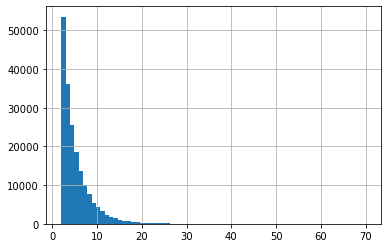

In [40]:
df.groupby('SessionId').size().hist(bins=70)

## NowPlaying (NOWP)

### nowplaying-session


In [17]:
args=Arguments(dataset='nowplaying-session')
args

Arguments(model='GRU4Rec', dataset='nowplaying-session', validation='False', valid_portion=0.1)

In [18]:
config_dict = {
    'USER_ID_FIELD': 'session_id',
    'load_col': None,
    'neg_sampling': None,
    'benchmark_filename': ['train', 'test'],
    'alias_of_item_id': ['item_id_list'],
    'topk': [20],
    'metrics': ['Recall', 'MRR'],
    'valid_metric': 'MRR@20'
}
config = Config(model=args.model, dataset=f'{args.dataset}', config_dict=config_dict)
config.final_config_dict

{'gpu_id': 0,
 'use_gpu': True,
 'seed': 2020,
 'state': 'INFO',
 'reproducibility': True,
 'data_path': 'dataset/nowplaying-session',
 'checkpoint_dir': 'saved',
 'show_progress': True,
 'save_dataset': False,
 'dataset_save_path': None,
 'save_dataloaders': False,
 'dataloaders_save_path': None,
 'log_wandb': False,
 'wandb_project': 'recbole',
 'epochs': 300,
 'train_batch_size': 2048,
 'learner': 'adam',
 'learning_rate': 0.001,
 'neg_sampling': None,
 'eval_step': 1,
 'stopping_step': 10,
 'clip_grad_norm': None,
 'weight_decay': 0.0,
 'loss_decimal_place': 4,
 'require_pow': False,
 'eval_args': {'split': {'LS': 'valid_and_test'},
  'order': 'TO',
  'mode': 'full',
  'group_by': 'user'},
 'repeatable': True,
 'metrics': ['Recall', 'MRR'],
 'topk': [20],
 'valid_metric': 'MRR@20',
 'valid_metric_bigger': True,
 'eval_batch_size': 4096,
 'metric_decimal_place': 4,
 'embedding_size': 64,
 'hidden_size': 128,
 'num_layers': 1,
 'dropout_prob': 0.3,
 'loss_type': 'CE',
 'field_separat

In [19]:
config.final_config_dict['data_path'] = os.path.join(os.path.dirname(os.getcwd()),config.final_config_dict['data_path'])
config.final_config_dict['data_path']

'/home/gkoren2/study/git/guyk1971/RecBole/dataset/nowplaying-session'

In [20]:
nowp_sess = create_dataset(config)
nowp_sess

nowplaying-session
The number of users: 825305
Average actions of users: 1.108837470798639
The number of items: 60417
Average actions of items: 15.168705453339964
The number of inters: 915128
The sparsity of the dataset: 99.99816469515658%
Remain Fields: ['session_id', 'item_id_list', 'item_id', 'item_length']

In [21]:
nowp_sess_df = nowp_sess.inter_feat
nowp_sess_df.head()


,session_id,item_id_list,item_id,item_length
0,1,[7500],1,1
1,2,[11906],2,1
2,3,"[1176, 4]",3,2
3,4,[1176],4,1
4,5,[7634],5,1
